In [4]:
#imports
#load some predictions
import os
import numpy as np
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
from meld_graph.training import tp_fp_fn_tn, dice_coeff
from meld_classifier.meld_cohort import MeldSubject,MeldCohort
from meld_graph.icospheres import IcoSpheres
from meld_graph.graph_tools import GraphTools
import itertools
import pandas as pd
from meld_graph.evaluation import load_prediction
from meld_graph import experiment

In [5]:
models = [
'23-10-30_FOPF_dcop','23-10-30_MSBS_dcop_with_combat']
experiment_dir = '/home/kw350/software/gdl/meld_classifier_GDL/scripts/experiments_folder/'


In [6]:
for model in models:
    full_results = pd.read_csv(os.path.join(experiment_dir,model,
                                          's_0','fold_all','results_best_model','test_results.csv'))
    sensitivity = np.mean(full_results['detected'][full_results['group']])
    specificity = (full_results['number FP clusters'][full_results['group']==0]>0).mean()
    total_detected = np.sum(full_results['number TP clusters'][full_results['group']])
    total_predicted = np.sum(full_results['number FP clusters'][full_results['group']])
    ppv = total_detected / (total_predicted + total_detected)
    print(model,np.round(sensitivity,2),np.round(1-specificity,2),np.round(ppv,2))

FileNotFoundError: [Errno 2] No such file or directory: '/home/kw350/software/gdl/meld_classifier_GDL/scripts/experiments_folder/23-10-30_FOPF_dcop/s_0/fold_all/results_best_model/test_results.csv'

In [12]:
#new site test results
new_sites = ['H27','H28','H101']
for model in models:
    print(model)
    print('Sensitivity,specificity,PPV')
    for new_site in new_sites:
        
        full_results = pd.read_csv(os.path.join(experiment_dir,model,
                                            's_0','fold_all',f'test_{new_site}','results_best_model','test_results.csv'))
        sensitivity = np.mean(full_results['detected'][full_results['group']])
        specificity = (full_results['number FP clusters'][full_results['group']==0]>0).mean()
        total_detected = np.sum(full_results['number TP clusters'][full_results['group']])
        total_predicted = np.sum(full_results['number FP clusters'][full_results['group']])
        ppv = total_detected / (total_predicted + total_detected)
        print(new_site,np.round(sensitivity,2),np.round(1-specificity,2),np.round(ppv,2))

23-10-30_FOPF_dcop
Sensitivity,specificity,PPV
H27 0.82 0.28 0.65
H28 0.69 nan 0.46
H101 0.62 0.79 0.78
23-10-30_MSBS_dcop_with_combat
Sensitivity,specificity,PPV
H27 0.82 0.72 0.88
H28 0.69 nan 0.46
H101 0.68 0.65 0.84


In [9]:
full_results

,ID,group,detected,number cresultsloadlusters,tp,fp,fn,tn,dice lesional,dice non-lesional
0,MELD_H27_3T_FCD_0001,True,False,1,0,1114,156,292534,7.874016e-19,0.997834
1,MELD_H27_3T_FCD_0002,True,False,0,0,0,1141,292663,8.764242e-19,0.998054
2,MELD_H27_3T_FCD_0003,True,True,3,7336,0,59711,226757,1.972494e-01,0.883655
3,MELD_H27_3T_FCD_0004,True,True,1,20736,5387,6228,261453,7.812082e-01,0.978270
4,MELD_H27_3T_FCD_0005,True,False,1,0,2315,965,290524,3.048780e-19,0.994387
5,MELD_H27_3T_FCD_0006,True,True,1,7984,0,23651,262169,4.030390e-01,0.956840
6,MELD_H27_3T_FCD_0007,True,True,1,6585,907,2068,284244,8.157324e-01,0.994794
7,MELD_H27_3T_FCD_0008,True,True,1,402,200,512,292690,5.303430e-01,0.998785
8,MELD_H27_3T_FCD_0009,True,False,1,0,2359,1015,290430,2.963841e-19,0.994225
9,MELD_H27_3T_FCD_0010,True,False,0,0,0,284,293520,3.521127e-18,0.999516


In [14]:

full_results = pd.read_csv(os.path.join(experiment_dir,'23-09-30_BMXI_big_dataset_long',
                                          's_0','fold_all','results_best_model','test_results.csv'))
sensitivity = np.mean(full_results['detected'][full_results['group']])
specificity = (full_results['number clusters'][full_results['group']==0]>0).mean()
print(sensitivity,1-specificity)
object_results = pd.read_csv(os.path.join(experiment_dir,'23-10-02_IHFS_object_detection',
                                          's_0','fold_all','results_best_model','test_results.csv'))
sensitivity = np.mean(object_results['detected'][object_results['group']])
specificity = (object_results['number clusters'][object_results['group']==0]>0).mean()
print(sensitivity,1-specificity)

0.6875 0.05405405405405406
0.8903846153846153 0.002590673575129543


In [6]:
(object_results['number clusters'][object_results['group']==0]>0).mean()

0.9459459459459459

In [ ]:

experiment_dir = '/home/kw350/software/gdl/meld_classifier_GDL/scripts/experiments_folder/'
object_results = pd.read_csv(os.path.join(experiment_dir,'23-08-30_IGKW_object_save_final',
                                          's_0','fold_all','results','test_results_best.csv'))


full_results = pd.read_csv(os.path.join(experiment_dir,'23-08-30_PYHE_big_dataset_long',
                 's_0','fold_all','results','test_results_best.csv'))

In [10]:
experiment_dir = '/home/kw350/software/gdl/meld_classifier_GDL/scripts/experiments_folder/'
experiments = ['23-09-30_BMXI_big_dataset_long','23-08-30_IGKW_object_save_final']
models = ['best_model.pt']

In [38]:
exp_i=0
exp = experiment.Experiment.from_folder(os.path.join(experiment_dir,experiments[exp_i],'s_0','fold_all'))
subjects = exp.data_parameters['test_ids']
val_subjects = exp.data_parameters['train_ids']
len(subjects)
    

Initialised Experiment 23-09-30_BMXI_big_dataset_long/s_0


/home/kw350/software/gdl/meld_classifier_GDL/scripts/experiments_folder/23-09-30_BMXI_big_dataset_long/s_0/fold_all


186

In [33]:
hdf5_file =os.path.join(experiment_dir, experiments[exp_i],'s_0','fold_all','results_best_model','predictions.hdf5')
cohort = MeldCohort(hdf5_file_root=exp.data_parameters['hdf5_file_root'], dataset=exp.data_parameters['dataset'])
icospheres = IcoSpheres()
gt = GraphTools(
            icospheres,
            cohort=cohort,
            distance_mask_medial_wall=True,
)

In [40]:
def get_scores(subjects,hdf5_file,cohort,thresh):
    
    subjects_dict = {}
    sensitivity=[]
    specificity=[]
    for s, subject in enumerate(subjects):
        if s % 100 == 0:
            print(s)
        subjects_dict[subject]={}
        pred = load_prediction(subject,hdf5_file,)
        subj = MeldSubject(subject, cohort=cohort)
        if '_FCD_' in subject:
            labels = []
            boundary_zones=[]
            for hemi in ['lh','rh']:
                label = subj.load_feature_lesion_data(features=[],hemi=hemi)[1]
                if label.sum() > 0:
                    dists = gt.fast_geodesics(label.astype(np.float32)
                    )[cohort.cortex_mask]
                    borderzone = dists<20
                else:
                    borderzone = np.zeros(sum(cohort.cortex_mask),dtype=bool)
                boundary_zones.append(borderzone)
                labels.append(label[cohort.cortex_mask])
            labels = np.concatenate(labels)
            boundary_zones = np.concatenate(boundary_zones)
        else:
            labels = np.zeros(2*len(pred['rh']))
            boundary_zones = np.zeros(2*len(pred['rh']),dtype=bool)
        subjects_dict[subject]['input_labels'] = labels
        subjects_dict[subject]['boundary_zones'] = boundary_zones
        subjects_dict[subject]['result'] = np.concatenate([pred['lh'],
                                                            pred['rh']])>thresh
        pred = load_prediction(subject,hdf5_file,'prediction_clustered')
        subjects_dict[subject]['sigmoid_pred'] = np.concatenate([pred['lh'],
                                                            pred['rh']])
        if subjects_dict[subject]['input_labels'].sum():
            detected = subjects_dict[subject]['result'][subjects_dict[subject]['boundary_zones']]
            sensitivity.append(detected.any())
        else:
            fp = subjects_dict[subject]['result'].sum()
            specificity.append(fp>0)
    return subjects_dict,sensitivity,specificity

In [41]:
thresh = 0.1568896532058716
#object
thresh = 0.14944605231285094

subjects_dict = {}
sensitivity=[]
specificity=[]
for s, subject in enumerate(subjects):
    if s % 100 == 0:
        print(s)
    subjects_dict[subject]={}
    pred = load_prediction(subject,hdf5_file,)
    subj = MeldSubject(subject, cohort=cohort)
    if '_FCD_' in subject:
        labels = []
        boundary_zones=[]
        for hemi in ['lh','rh']:
            label = subj.load_feature_lesion_data(features=[],hemi=hemi)[1]
            if label.sum() > 0:
                dists = gt.fast_geodesics(label.astype(np.float32)
                )[cohort.cortex_mask]
                borderzone = dists<20
            else:
                borderzone = np.zeros(sum(cohort.cortex_mask),dtype=bool)
            boundary_zones.append(borderzone)
            labels.append(label[cohort.cortex_mask])
        labels = np.concatenate(labels)
        boundary_zones = np.concatenate(boundary_zones)
    else:
        labels = np.zeros(2*len(pred['rh']))
        boundary_zones = np.zeros(2*len(pred['rh']),dtype=bool)
    subjects_dict[subject]['input_labels'] = labels
    subjects_dict[subject]['boundary_zones'] = boundary_zones
    subjects_dict[subject]['result'] = np.concatenate([pred['lh'],
                                                           pred['rh']])>0.1568896532058716
    pred = load_prediction(subject,hdf5_file,'prediction_clustered')
    subjects_dict[subject]['sigmoid_pred'] = np.concatenate([pred['lh'],
                                                           pred['rh']])
    if subjects_dict[subject]['input_labels'].sum():
        detected = subjects_dict[subject]['result'][subjects_dict[subject]['boundary_zones']]        
        sensitivity.append(detected.any())
    else:
        fp = subjects_dict[subject]['result'].sum()
        specificity.append(fp>0)
    

0


KeyboardInterrupt: 

In [36]:
np.mean(sensitivity),1-np.mean(np.array(specificity)>0)

(0.6730769230769231, 0.7305699481865284)

In [31]:
np.mean(sensitivity),1-np.mean(np.array(specificity)>0)

(0.7053571428571429, 0.5945945945945945)

In [42]:
comparison = {}
threshes=[0.1568896532058716,0.14944605231285094]
for mi,model in enumerate(models):
    hdf5_file =os.path.join(experiment_dir, experiments[mi],'s_0','fold_all','results_best_model','predictions.hdf5')

    subjects_dict, sensitivity, specificity = get_scores(subjects,hdf5_file,cohort,thresh=threshes[mi])

    comparison[model] = [np.mean(sensitivity),1-np.mean(specificity)]
    

0
100


In [ ]:
len(subjects)

In [6]:
control_predictions = []
model=models[0]
hdf5_file =os.path.join(experiment_dir, experiments[0],'s_0','fold_all','results','predictions'+model.split('.')[0]+'.hdf5')

for s, subject in enumerate(subjects):
    if '_C_':
        pred = load_prediction(subject,hdf5_file,)
        control_predictions.append(np.concatenate([pred['lh'],
                                                              pred['rh']]))
    

In [7]:
control_predictions = np.concatenate(control_predictions)
ids = np.random.choice(len(control_predictions),size=100000,replace=True)

<AxesSubplot:ylabel='Density'>

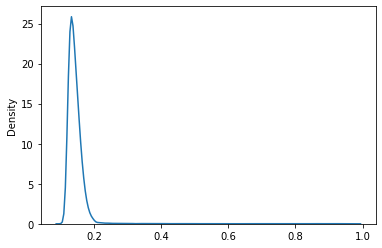

In [11]:
sns.kdeplot(control_predictions[ids])